In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [2]:


df = pd.read_excel("Book1.xlsx")
df.head()

,Issuer Name,Amt Issued,Issue Date,Yld to Mty (Ask),Yld to Mty (Bid),Yld to Mty (Mid),Maturity,S&P Outlook,S&P Rating,Currency,Yield at Issue,LQA Bid-Ask Spread,Market Cap,Volume,Avg Vol 30D,Avg Vol 5D,LQA Expected Daily Vol
0,UBS Group AG,1.636152e+09,11/13/2023,8.547007,8.603611,8.575216,#N/A Field Not Applicable,NEG,BB,USD,NaN,0.291867,8.516736e+10,#N/A Field Not Applicable,NaN,NaN,4.118754e+06
1,UBS Group AG,1.636152e+09,11/13/2023,8.530456,8.530456,8.530456,#N/A Field Not Applicable,NEG,BB,USD,4.492,0.298033,8.516736e+10,3500,NaN,1460.0,4.375580e+06
2,Credit Agricole SA,1.250000e+09,11/27/2023,3.975343,4.010123,3.992718,11/27/2033,STABLE,A-,EUR,4.429,0.053609,3.699918e+10,#N/A Field Not Applicable,NaN,NaN,9.976294e+05
3,Intesa Sanpaolo SpA,1.750000e+09,11/16/2023,4.670643,4.706842,4.688739,11/16/2025,STABLE,BBB,EUR,NaN,0.018107,4.913502e+10,#N/A Field Not Applicable,NaN,NaN,6.054987e+06
4,Intesa Sanpaolo SpA,1.365256e+09,11/28/2023,6.900918,6.939746,6.920315,11/28/2033,STABLE,BBB,USD,7.214,0.079522,4.913502e+10,#N/A Field Not Applicable,NaN,NaN,3.386611e+06


In [3]:
df.shape

(1156, 17)

In [4]:
df = df.loc[:, ["Yld to Mty (Ask)", "Yld to Mty (Bid)", "Yld to Mty (Mid)", "LQA Bid-Ask Spread","Market Cap","LQA Expected Daily Vol"]]
df.head()

,Yld to Mty (Ask),Yld to Mty (Bid),Yld to Mty (Mid),LQA Bid-Ask Spread,Market Cap,LQA Expected Daily Vol
0,8.547007,8.603611,8.575216,0.291867,8.516736e+10,4.118754e+06
1,8.530456,8.530456,8.530456,0.298033,8.516736e+10,4.375580e+06
2,3.975343,4.010123,3.992718,0.053609,3.699918e+10,9.976294e+05
3,4.670643,4.706842,4.688739,0.018107,4.913502e+10,6.054987e+06
4,6.900918,6.939746,6.920315,0.079522,4.913502e+10,3.386611e+06


In [5]:
df_cleaned = df[df["Market Cap"] != "#N/A Field Not Applicable"]
df_cleaned = df[df["Yld to Mty (Ask)"] != "#N/A Field Not Applicable"]
df_cleaned = df[df["LQA Expected Daily Vol"] != "#N/A Field Not Applicable"]
df_cleaned

,Yld to Mty (Ask),Yld to Mty (Bid),Yld to Mty (Mid),LQA Bid-Ask Spread,Market Cap,LQA Expected Daily Vol
0,8.547007,8.603611,8.575216,0.291867,8.516736e+10,4.118754e+06
1,8.530456,8.530456,8.530456,0.298033,8.516736e+10,4.375580e+06
2,3.975343,4.010123,3.992718,0.053609,3.699918e+10,9.976294e+05
3,4.670643,4.706842,4.688739,0.018107,4.913502e+10,6.054987e+06
4,6.900918,6.939746,6.920315,0.079522,4.913502e+10,3.386611e+06
...,...,...,...,...,...,...
1151,2.869459,2.994109,2.931654,0.644472,NaN,3.941440e+06
1152,3.701524,4.639574,4.1688,NaN,1.406413e+10,NaN
1153,3.692517,4.646244,4.167584,NaN,1.406413e+10,NaN
1154,0.744462,0.744462,0.744462,NaN,NaN,NaN


In [6]:
# Replace '#N/A Field Not Applicable' with NaN
df_cleaned.replace('#N/A Field Not Applicable', np.nan, inplace=True)

In [7]:
df_cleaned.isnull().sum()

Yld to Mty (Ask)           17
Yld to Mty (Bid)           17
Yld to Mty (Mid)           17
LQA Bid-Ask Spread         45
Market Cap                210
LQA Expected Daily Vol     45
dtype: int64

In [8]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_cleaned['Market Cap'] = imputer.fit_transform(df_cleaned[['Market Cap']])


In [9]:
df_cleaned.dropna(inplace=True)

In [10]:
df_cleaned.isnull().sum()

Yld to Mty (Ask)          0
Yld to Mty (Bid)          0
Yld to Mty (Mid)          0
LQA Bid-Ask Spread        0
Market Cap                0
LQA Expected Daily Vol    0
dtype: int64

### 1. **Yield Spread:**
This can provide insights into the spread between what sellers are asking for and what buyers are willing to pay.




In [11]:

df_cleaned['Yield Spread'] = df_cleaned['Yld to Mty (Ask)'] - df_cleaned['Yld to Mty (Bid)']

### 2. Liquidity Ratio:
Create a liquidity ratio by dividing the trading volume by the bid-ask spread. This ratio can give a sense of how much trading activity there is relative to the bid-ask spread.



In [12]:
df_cleaned['Liquidity Ratio'] = df_cleaned['LQA Expected Daily Vol'] / df_cleaned['LQA Bid-Ask Spread']

In [13]:
df_cleaned.columns

Index(['Yld to Mty (Ask)', 'Yld to Mty (Bid)', 'Yld to Mty (Mid)',
       'LQA Bid-Ask Spread', 'Market Cap', 'LQA Expected Daily Vol',
       'Yield Spread', 'Liquidity Ratio'],
      dtype='object')

In [14]:



correlation_matrix = df_cleaned.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        Yld to Mty (Ask)  Yld to Mty (Bid)  Yld to Mty (Mid)  \
Yld to Mty (Ask)                1.000000          0.978573          0.996006   
Yld to Mty (Bid)                0.978573          1.000000          0.992997   
Yld to Mty (Mid)                0.996006          0.992997          1.000000   
LQA Bid-Ask Spread              0.067783          0.069221          0.070165   
Market Cap                     -0.039261         -0.038732         -0.039348   
LQA Expected Daily Vol         -0.000142          0.000189          0.000127   
Yield Spread                   -0.640996         -0.785299         -0.706773   
Liquidity Ratio                 0.000618          0.000545          0.000722   

                        LQA Bid-Ask Spread  Market Cap  \
Yld to Mty (Ask)                  0.067783   -0.039261   
Yld to Mty (Bid)                  0.069221   -0.038732   
Yld to Mty (Mid)                  0.070165   -0.039348   
LQA Bid-Ask Spread         

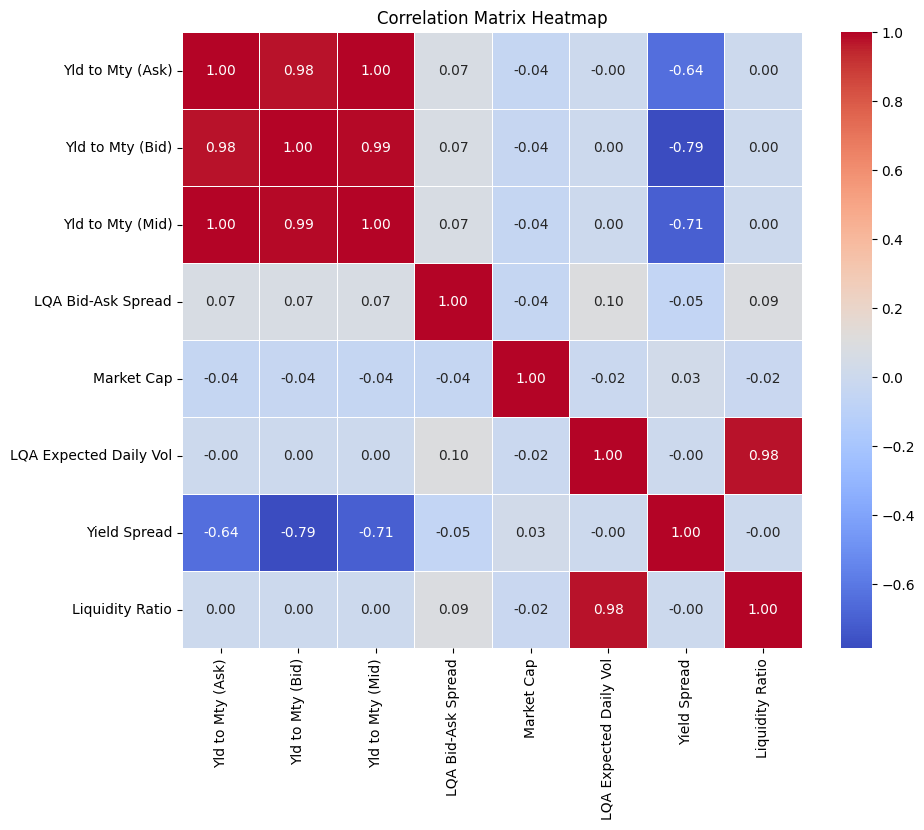

In [15]:

# Create a heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:

# Find highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Drop highly correlated features
df_cleaned = df_cleaned.drop(columns=highly_correlated_features)


In [17]:
df_cleaned.head()

,Yld to Mty (Ask),LQA Bid-Ask Spread,Market Cap,LQA Expected Daily Vol,Yield Spread
0,8.547007,0.291867,8.516736e+10,4.118754e+06,-0.056605
1,8.530456,0.298033,8.516736e+10,4.375580e+06,0.000000
2,3.975343,0.053609,3.699918e+10,9.976294e+05,-0.034780
3,4.670643,0.018107,4.913502e+10,6.054987e+06,-0.036199
4,6.900918,0.079522,4.913502e+10,3.386611e+06,-0.038828


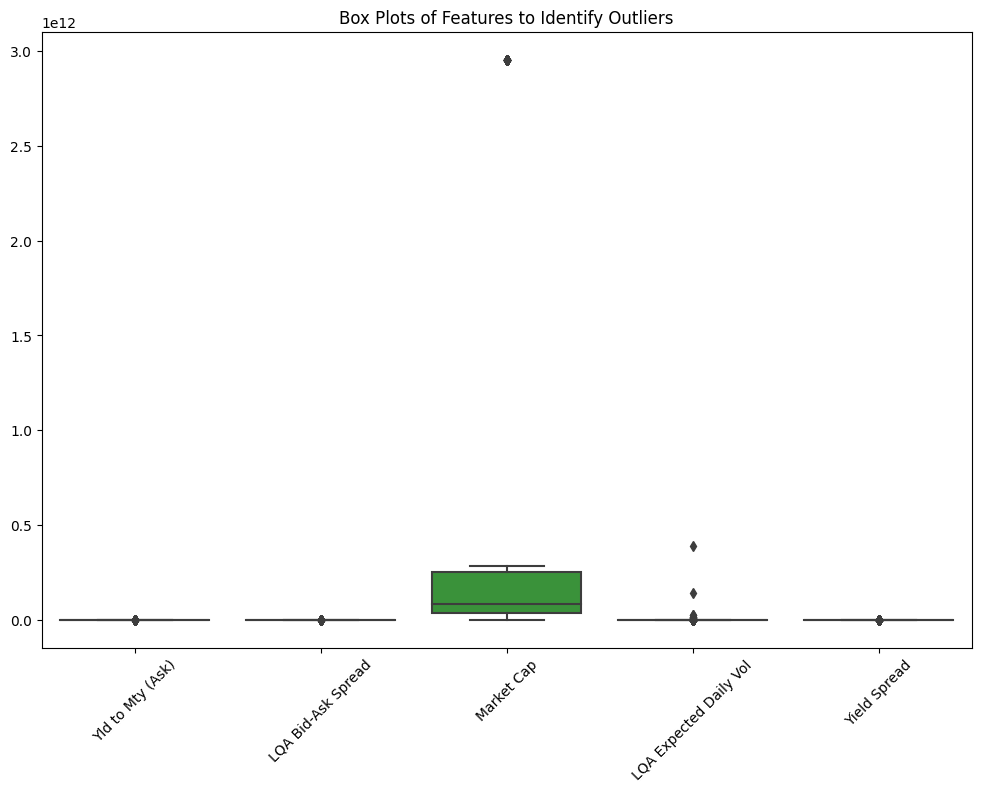

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
columns_to_plot = ['Yld to Mty (Ask)', 'LQA Bid-Ask Spread', 'Market Cap', 'LQA Expected Daily Vol', 'Yield Spread']

# Create box plots to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[columns_to_plot])
plt.title('Box Plots of Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()


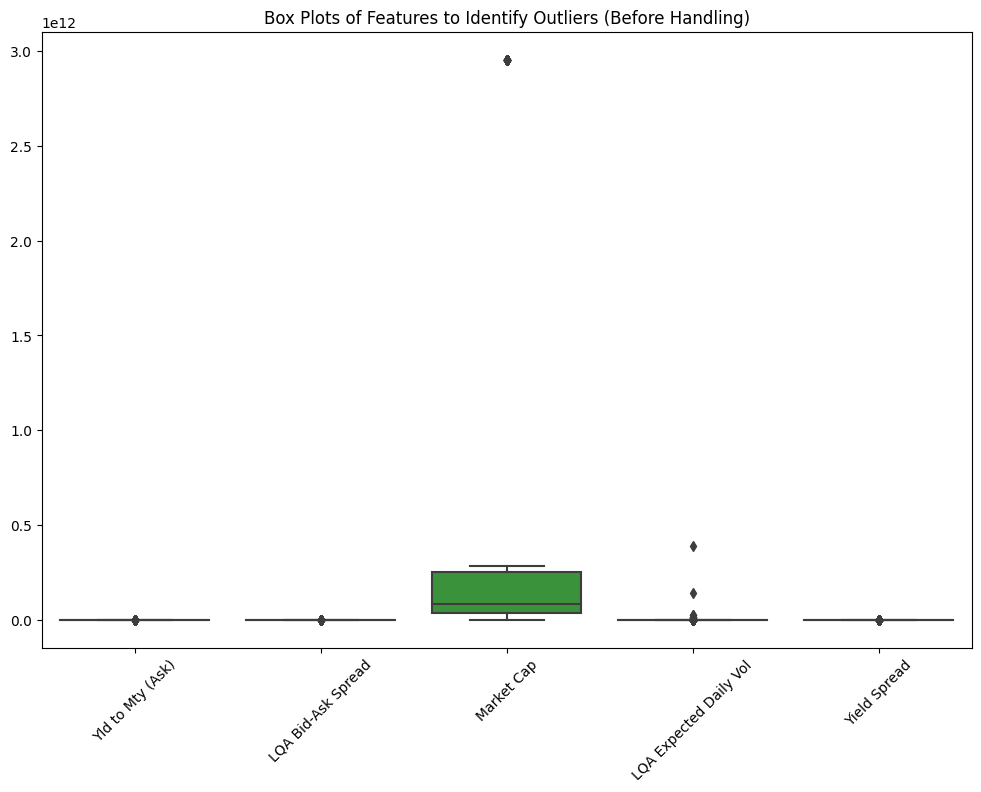

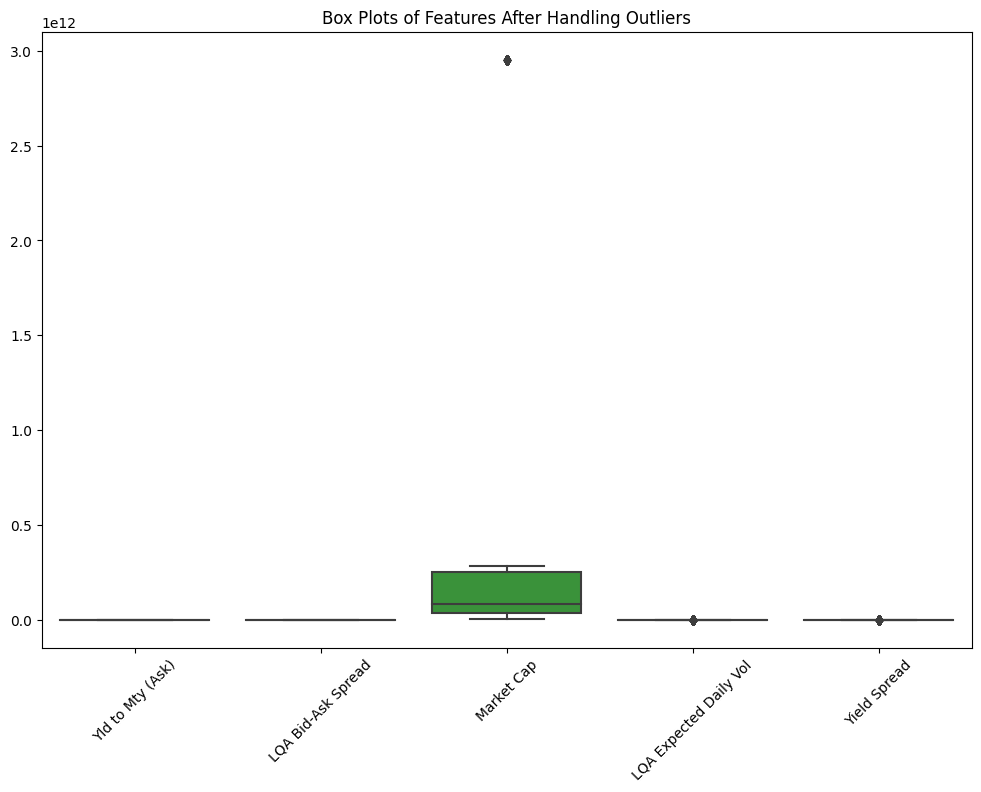

In [19]:
from scipy.stats.mstats import winsorize

# Create box plots to visualize outliers before handling
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[columns_to_plot])
plt.title('Box Plots of Features to Identify Outliers (Before Handling)')
plt.xticks(rotation=45)
plt.show()

# Winsorize outliers
for column in columns_to_plot:
    df_cleaned[column] = winsorize(df_cleaned[column], limits=[0.05, 0.05])

# Create box plots again to visualize outliers after handling
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[columns_to_plot])
plt.title('Box Plots of Features After Handling Outliers')
plt.xticks(rotation=45)
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler
# Standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

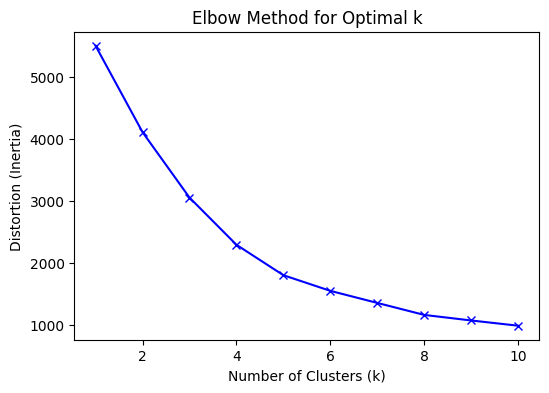

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled[['Yld to Mty (Ask)', 'LQA Bid-Ask Spread', 'Market Cap', 'LQA Expected Daily Vol', 'Yield Spread']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [22]:
kmeans = KMeans(n_clusters=3)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)


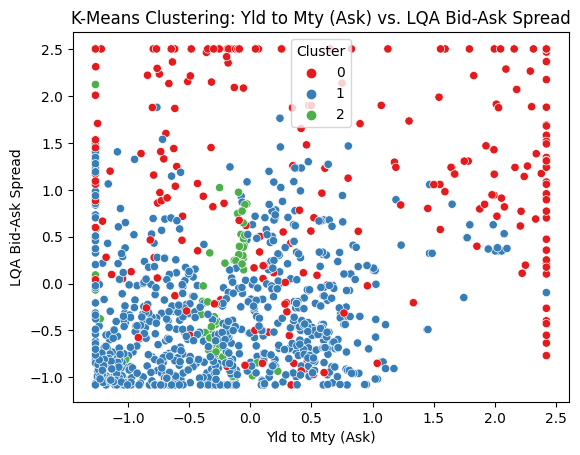

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set1")
sns.scatterplot(x='Yld to Mty (Ask)', y='LQA Bid-Ask Spread', hue='Cluster', data=df_scaled, palette='Set1')
plt.title('K-Means Clustering: Yld to Mty (Ask) vs. LQA Bid-Ask Spread')
plt.show()


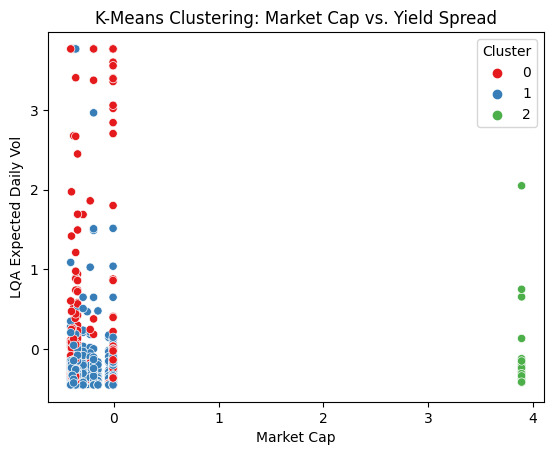

In [24]:
sns.scatterplot(x='Market Cap', y='LQA Expected Daily Vol', hue='Cluster', data=df_scaled, palette='Set1')
plt.title('K-Means Clustering: Market Cap vs. Yield Spread')
plt.show()


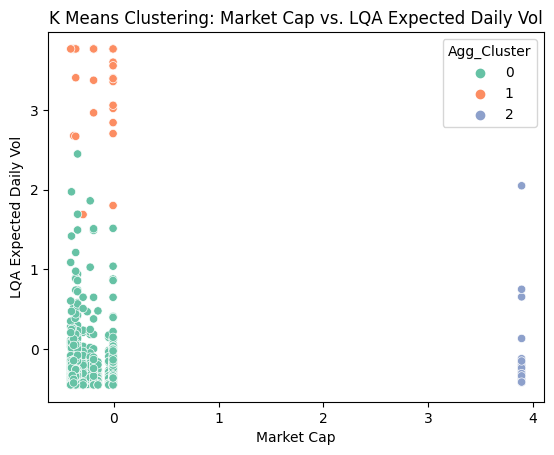

In [25]:
from sklearn.cluster import AgglomerativeClustering


agg_clustering = AgglomerativeClustering(n_clusters=3)
df_scaled['Agg_Cluster'] = agg_clustering.fit_predict(df_scaled[['Yld to Mty (Ask)', 'LQA Bid-Ask Spread', 'Market Cap', 'LQA Expected Daily Vol', 'Yield Spread']])
sns.set_palette("Set2")

sns.scatterplot(x='Market Cap', y='LQA Expected Daily Vol', hue='Agg_Cluster', data=df_scaled, palette='Set2')
plt.title('K Means Clustering: Market Cap vs. LQA Expected Daily Vol')
plt.show()


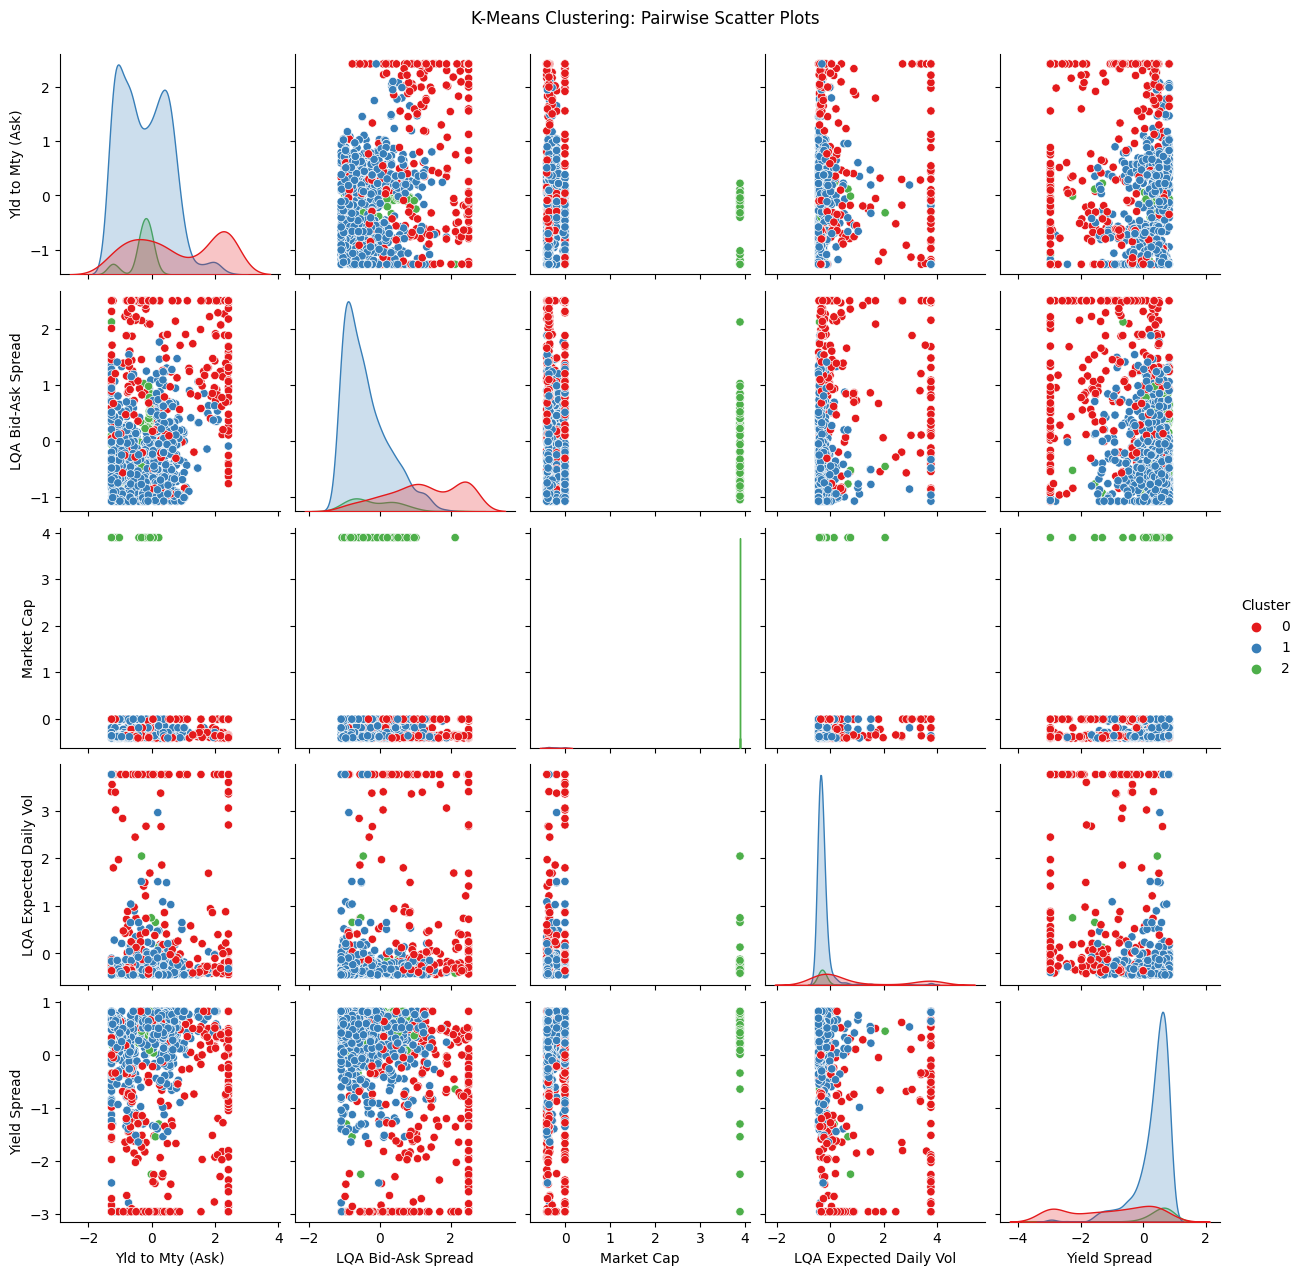

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns for plotting
columns_to_plot = ['Yld to Mty (Ask)', 'LQA Bid-Ask Spread', 'Market Cap', 'LQA Expected Daily Vol', 'Yield Spread']

# Adding the 'Cluster' column for hue
df_scaled['Cluster'] = kmeans.labels_  # Assuming 'kmeans' is your fitted KMeans model

# Creating pair plots
sns.set_palette("Set1")
sns.pairplot(df_scaled[columns_to_plot + ['Cluster']], hue='Cluster', palette='Set1')
plt.suptitle('K-Means Clustering: Pairwise Scatter Plots', y=1.02)
plt.show()


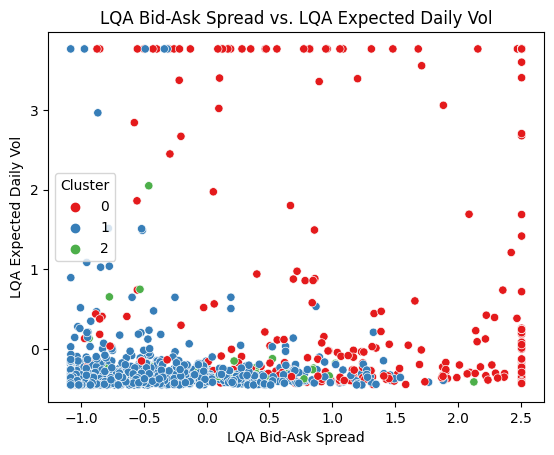

In [27]:
sns.set_palette("Set1")
sns.scatterplot(x='LQA Bid-Ask Spread', y='LQA Expected Daily Vol', hue='Cluster', data=df_scaled, palette='Set1')
plt.title('LQA Bid-Ask Spread vs. LQA Expected Daily Vol')
plt.show()

In [28]:
# Selecting columns for clustering
columns_for_clustering = ['Yld to Mty (Ask)', 'LQA Bid-Ask Spread', 'Market Cap', 'LQA Expected Daily Vol', 'Yield Spread']